<a href="https://colab.research.google.com/github/chris20834/Download_Traditional_Chinese/blob/main/%E8%A6%96%E8%A6%BA%E5%8C%96%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 下載繁體中文字型

In [34]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 下載繁體中文字型
!wget -O SourceHanSerifTW-VF.ttf https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf

# 加入字型檔
fm.fontManager.addfont('SourceHanSerifTW-VF.ttf')

# 設定字型
#
mpl.rc('font', family='Source Han Serif TW VF')

--2025-10-02 06:17:10--  https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf [following]
--2025-10-02 06:17:10--  https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16851180 (16M) [application/octet-stream]
Saving to: ‘SourceHanSerifTW-VF.ttf’

SourceHanSerifTW-VF 100%[===================>]  16.07M  --.-KB/s

# 一、平均評量次數-折線圖

In [35]:
import pandas as pd

# 讀取上傳的工作表
df = pd.read_excel("/content/生成式AI增能攻略-10002641_平均評量次數.xlsx", sheet_name="平均評量次數")

# 檢視前幾列資料
df.head()

,title,avg_times,participation_rate,pass_rate,correct_rate,avg_score,level
0,第三周_單元測驗二,0.6,41.5%,40.7%,80.42%,89.39,低:100% 中:0% 高:0%
1,第三周_單元測驗一,0.6,43.1%,41.1%,69.02%,78.05,低:100% 中:0% 高:0%
2,第二周_單元測驗一,1.4,48.4%,41.5%,52.34%,72.17,低:100% 中:0% 高:0%
3,第二周_單元測驗二,0.7,39.9%,37.7%,67.33%,83.26,低:100% 中:0% 高:0%
4,期末測驗,0.5,46.3%,39.3%,72.36%,73.84,低:100% 中:0% 高:0%


In [36]:
# 2) 簡單資料前處理（例如觀察缺失值）
missing_value = df.isnull().sum()
missing_value

,0
title,0
avg_times,0
participation_rate,0
pass_rate,0
correct_rate,0
avg_score,0
level,0


In [37]:
# 3) 百分比字串轉數字（例如 "57.8%" -> 57.8）
df["參與率數值"] = df["participation_rate"].astype(str).str.replace("%", "").astype(float)
df

,title,avg_times,participation_rate,pass_rate,correct_rate,avg_score,level,參與率數值
0,第三周_單元測驗二,0.6,41.5%,40.7%,80.42%,89.39,低:100% 中:0% 高:0%,41.5
1,第三周_單元測驗一,0.6,43.1%,41.1%,69.02%,78.05,低:100% 中:0% 高:0%,43.1
2,第二周_單元測驗一,1.4,48.4%,41.5%,52.34%,72.17,低:100% 中:0% 高:0%,48.4
3,第二周_單元測驗二,0.7,39.9%,37.7%,67.33%,83.26,低:100% 中:0% 高:0%,39.9
4,期末測驗,0.5,46.3%,39.3%,72.36%,73.84,低:100% 中:0% 高:0%,46.3
5,第一周_單元測驗二,0.8,53.8%,52.5%,78.82%,87.17,低:100% 中:0% 高:0%,53.8
6,第一周_單元測驗一,0.8,57.8%,56.2%,74.47%,86.03,低:100% 中:0% 高:0%,57.8


In [38]:
# 4) 按課程時間排序
order = [
    "第一周_單元測驗一","第一周_單元測驗二",
    "第二周_單元測驗一","第二周_單元測驗二",
    "第三周_單元測驗一","第三周_單元測驗二",
    "期末測驗"
]
df = df.set_index("title").reindex(order).reset_index()
df

,title,avg_times,participation_rate,pass_rate,correct_rate,avg_score,level,參與率數值
0,第一周_單元測驗一,0.8,57.8%,56.2%,74.47%,86.03,低:100% 中:0% 高:0%,57.8
1,第一周_單元測驗二,0.8,53.8%,52.5%,78.82%,87.17,低:100% 中:0% 高:0%,53.8
2,第二周_單元測驗一,1.4,48.4%,41.5%,52.34%,72.17,低:100% 中:0% 高:0%,48.4
3,第二周_單元測驗二,0.7,39.9%,37.7%,67.33%,83.26,低:100% 中:0% 高:0%,39.9
4,第三周_單元測驗一,0.6,43.1%,41.1%,69.02%,78.05,低:100% 中:0% 高:0%,43.1
5,第三周_單元測驗二,0.6,41.5%,40.7%,80.42%,89.39,低:100% 中:0% 高:0%,41.5
6,期末測驗,0.5,46.3%,39.3%,72.36%,73.84,低:100% 中:0% 高:0%,46.3


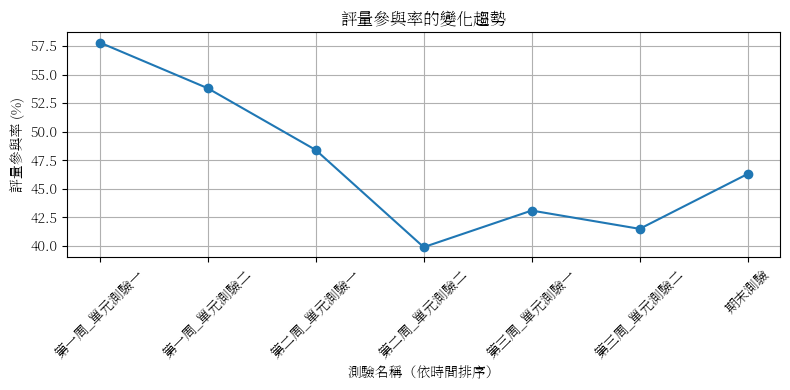

In [39]:
# 5) 視覺化（折線圖）
plt.figure(figsize=(8,4))
plt.plot(df["title"], df["參與率數值"], marker="o", linestyle="-")
plt.title("評量參與率的變化趨勢")
plt.xlabel("測驗名稱（依時間排序）")
plt.ylabel("評量參與率 (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig("participation_rate_trend.png", dpi=300)
plt.show()

# 二、學生成績分布-直方圖

In [40]:
# 讀取指定的工作表
df2 = pd.read_excel("/content/生成式AI增能攻略-10002641_累計報表.xlsx", sheet_name="累計報表")

# 檢視前幾列資料
df2.head()

,username,quiz,discussion-post,access-quiz,access-course,use-material,view-material,access-job,access-stream,score,group
0,moesso_10125105,0,0,0,0,0,00:00:00,0,0,0.0,NaN
1,moesso_282495,0,0,0,0,0,00:00:00,0,0,0.0,NaN
2,moesso_282946,0,0,0,0,0,00:00:00,0,0,0.0,NaN
3,moesso_284295,6,0,7,5,33,3:3:20,0,0,68.6,NaN
4,moesso_284449,7,0,7,8,13,0:18:49,0,0,88.4,NaN


In [41]:
# 快速查看描述性統計內容
df2.describe()

,quiz,discussion-post,access-quiz,access-course,use-material,access-job,access-stream,score,group
count,915.000000,915.0,915.000000,915.000000,915.000000,915.0,915.0,915.000000,0.0
mean,4.972678,0.0,5.748634,7.510383,6.099454,0.0,0.0,35.506011,NaN
std,9.474850,0.0,10.325458,10.026259,14.535099,0.0,0.0,35.766837,NaN
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,NaN
25%,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,NaN
50%,2.000000,0.0,4.000000,4.000000,0.000000,0.0,0.0,20.000000,NaN
75%,7.000000,0.0,8.000000,11.000000,6.000000,0.0,0.0,69.200000,NaN
max,120.000000,0.0,120.000000,151.000000,166.000000,0.0,0.0,96.800000,NaN


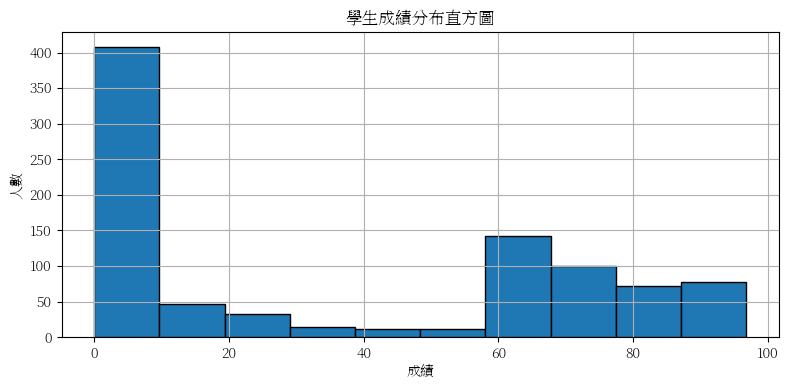

In [42]:
# 繪製成績直方圖
plt.figure(figsize=(8,4))
plt.hist(df2["score"].dropna(), bins=10, edgecolor="black")
plt.title("學生成績分布直方圖")
plt.xlabel("成績")
plt.ylabel("人數")
plt.grid(True)
plt.tight_layout()
#plt.savefig("score_histogram.png", dpi=300)
plt.show()

# 三、學習行為與成績的相關係數-熱力圖

In [43]:
import seaborn as sns

# 1) 讀取指定的工作表
df3 = pd.read_excel("/content/生成式AI增能攻略-10002641_累計報表.xlsx", sheet_name="累計報表")
df3.head()

,username,quiz,discussion-post,access-quiz,access-course,use-material,view-material,access-job,access-stream,score,group
0,moesso_10125105,0,0,0,0,0,00:00:00,0,0,0.0,NaN
1,moesso_282495,0,0,0,0,0,00:00:00,0,0,0.0,NaN
2,moesso_282946,0,0,0,0,0,00:00:00,0,0,0.0,NaN
3,moesso_284295,6,0,7,5,33,3:3:20,0,0,68.6,NaN
4,moesso_284449,7,0,7,8,13,0:18:49,0,0,88.4,NaN


In [44]:
# 2) 移除全為 NaN 或全為 0 的特徵
df_clean = df3.dropna(axis=1, how="all").loc[:, (df3 != 0).any()]
df_clean.head()

,username,quiz,access-quiz,access-course,use-material,view-material,score
0,moesso_10125105,0,0,0,0,00:00:00,0.0
1,moesso_282495,0,0,0,0,00:00:00,0.0
2,moesso_282946,0,0,0,0,00:00:00,0.0
3,moesso_284295,6,7,5,33,3:3:20,68.6
4,moesso_284449,7,7,8,13,0:18:49,88.4


In [45]:
# 3) 選擇數值型欄位
numeric_cols_clean = df_clean.select_dtypes(include=["number"]).columns.tolist()

# 4) 計算相關係數
corr_clean = df_clean[numeric_cols_clean].corr(method='spearman')
corr_clean

,quiz,access-quiz,access-course,use-material,score
quiz,1.000000,0.978349,0.774391,0.644916,0.908357
access-quiz,0.978349,1.000000,0.780603,0.633984,0.888641
access-course,0.774391,0.780603,1.000000,0.596607,0.784359
use-material,0.644916,0.633984,0.596607,1.000000,0.643670
score,0.908357,0.888641,0.784359,0.643670,1.000000


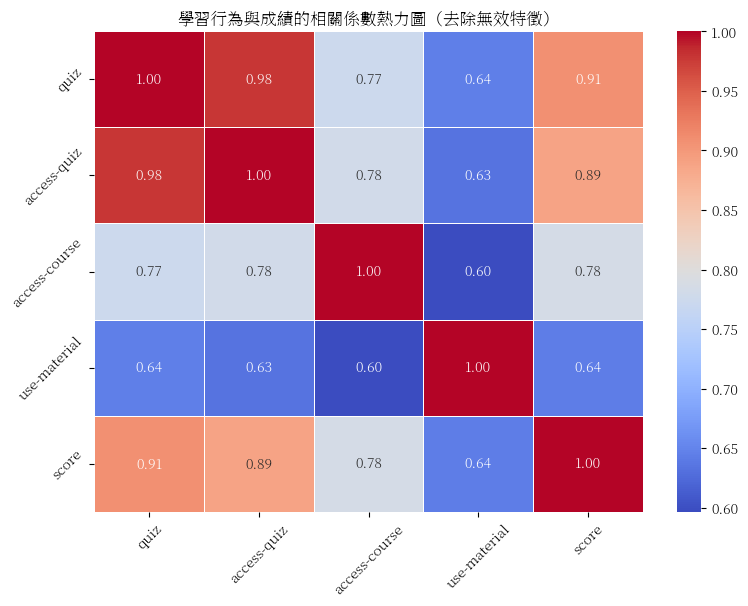

In [46]:
# 5) 繪製相關係數熱力圖
plt.figure(figsize=(8,6))
sns.heatmap(corr_clean, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.title("學習行為與成績的相關係數熱力圖（去除無效特徵）")
plt.show()

# 四、學生學習行為模式比較-箱型圖

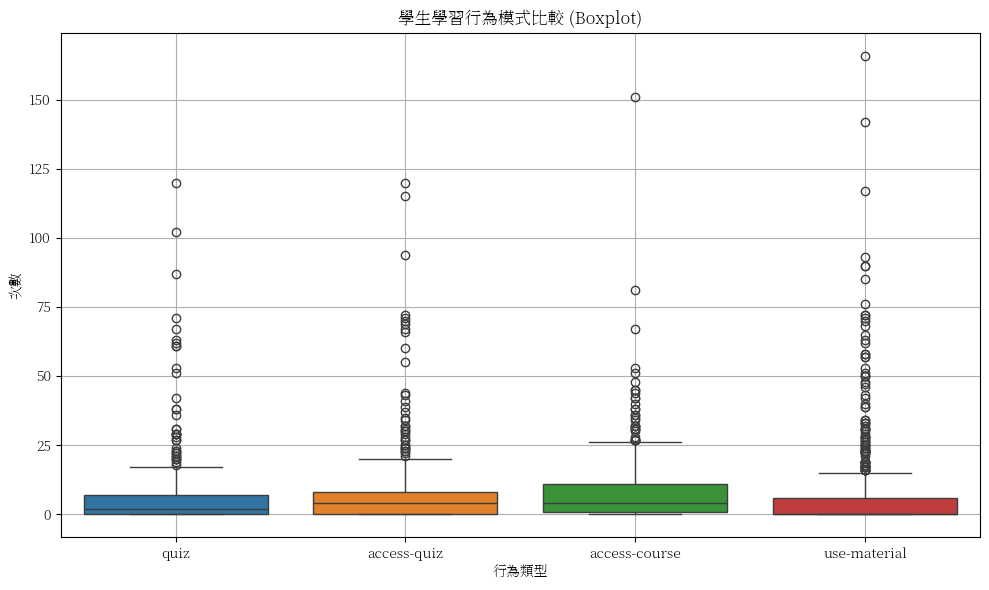

In [47]:
# 1) 讀取指定的工作表
df4 = pd.read_excel("/content/生成式AI增能攻略-10002641_累計報表.xlsx", sheet_name="累計報表")

# 2) 移除全為 NaN 或全為 0 的特徵
df_clean = df4.dropna(axis=1, how="all").loc[:, (df4 != 0).any()]

# 3) 選擇要比較的幾個學習行為
behaviors = ["quiz", "access-quiz", "access-course", "use-material"]

# 4) 繪製箱型圖，橫軸為行為類型，縱軸為次數
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean[behaviors])
plt.title("學生學習行為模式比較 (Boxplot)")
plt.ylabel("次數")
plt.xlabel("行為類型")
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
# 精簡：移除全 NaN / 全 0 欄位；用成績中位數切成高低兩組
df_clean["group"] = np.where(df_clean["score"] >= df_clean["score"].median(), "High", "Low")
df_clean.head()

,username,quiz,access-quiz,access-course,use-material,view-material,score,group
0,moesso_10125105,0,0,0,0,00:00:00,0.0,Low
1,moesso_282495,0,0,0,0,00:00:00,0.0,Low
2,moesso_282946,0,0,0,0,00:00:00,0.0,Low
3,moesso_284295,6,7,5,33,3:3:20,68.6,High
4,moesso_284449,7,7,8,13,0:18:49,88.4,High


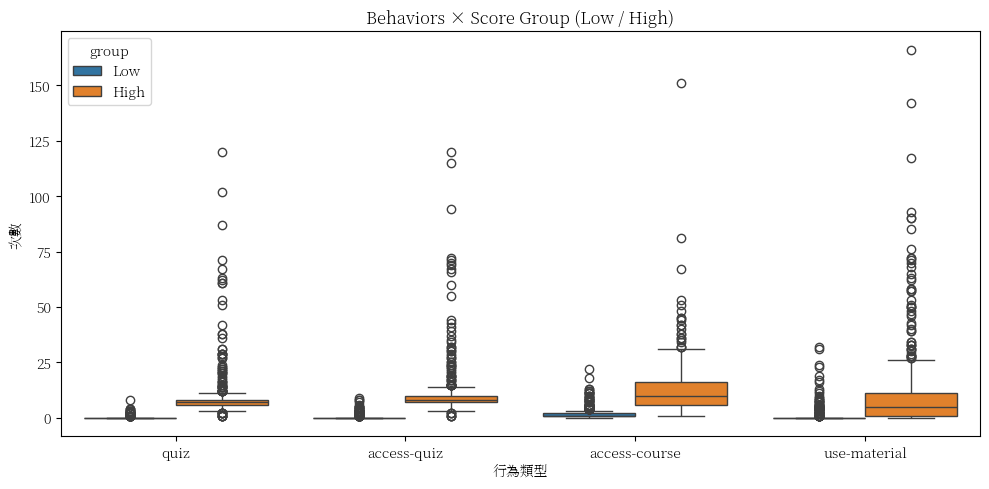

In [49]:
# 轉長表做群組箱型圖：一個行為對應兩個箱（Low/High）
df_long = df_clean.melt(id_vars="group", value_vars=behaviors,
                  var_name="行為類型", value_name="次數")

plt.figure(figsize=(10,5))
sns.boxplot(data=df_long, x="行為類型", y="次數", hue="group")
plt.title("Behaviors × Score Group (Low / High)")
plt.xlabel("行為類型"); plt.ylabel("次數")
plt.tight_layout(); plt.show()

# 五、學生分群-KMeans + PCA 散點

In [50]:
# 高階：學生分群（KMeans） + PCA 視覺化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) 讀取資料
df = pd.read_excel("/content/生成式AI增能攻略-10002641_累計報表.xlsx", sheet_name="累計報表")

# 2) 選用行為特徵（存在才用），並清理
features = [c for c in ["quiz", "access-quiz", "access-course", "use-material"] if c in df.columns]
X = df[features].fillna(0)

Ｘ

,quiz,access-quiz,access-course,use-material
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,6,7,5,33
4,7,7,8,13
...,...,...,...,...
910,0,0,1,0
911,0,0,4,0
912,0,0,2,0
913,7,10,19,3


In [51]:
# 3) 標準化 + KMeans 分群（k=3）
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Z = StandardScaler().fit_transform(X.values)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(Z)

Z, labels[:10]

(array([[-0.52511621, -0.5570482 , -0.7494809 , -0.4198657 ],
        [-0.52511621, -0.5570482 , -0.7494809 , -0.4198657 ],
        [-0.52511621, -0.5570482 , -0.7494809 , -0.4198657 ],
        ...,
        [-0.52511621, -0.5570482 , -0.54989562, -0.4198657 ],
        [ 0.21408584,  0.4119615 ,  1.14657927, -0.21335587],
        [-0.52511621, -0.5570482 , -0.54989562, -0.4198657 ]]),
 array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32))

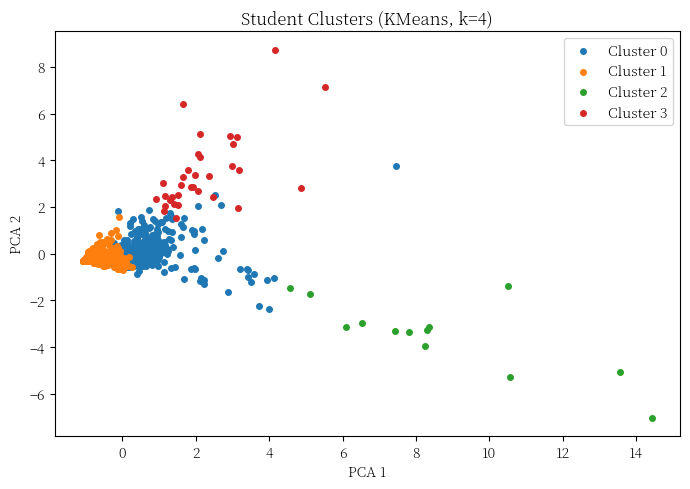

In [52]:
# 4) PCA 降到 2 維 + 單次散點（顏色依 labels，自動套用預設配色）
XY = PCA(2).fit_transform(Z)
plt.figure(figsize=(7,5))
for k in sorted(np.unique(labels)):
    m = labels == k
    plt.scatter(XY[m,0], XY[m,1], s=16, label=f"Cluster {k}")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2"); plt.title("Student Clusters (KMeans, k=4)")
plt.legend(); plt.tight_layout()

In [53]:
# 5) 各群中位數摘要（含成績，若有）
cols = features + (['score'] if 'score' in df.columns else [])
summary = df.assign(cluster=labels)[['cluster']+cols].groupby('cluster').median().reset_index()
summary["n"] = summary["cluster"].map(pd.Series(labels).value_counts())
summary

,cluster,quiz,access-quiz,access-course,use-material,score,n
0,0,7.0,8.0,12.0,6.0,71.5,338
1,1,0.0,0.0,1.0,0.0,0.0,531
2,2,62.0,69.0,16.0,2.0,60.2,13
3,3,9.0,10.0,13.0,58.0,81.8,33


# 六、教材瀏覽趨勢-折線圖

In [54]:
# 1) # 讀入試算表
df = pd.read_excel("/content/生成式AI增能攻略-10002641_影片瀏覽.xlsx", sheet_name="影片瀏覽")
df.head()

,username,title,click,video-time,start-time,end-time,playing-time,speed
0,moesso_284295,微調LLaMA模型,1,00:00:11,2025-05-02 17:09:20,2025-05-02 17:29:04,1184,1x
1,moesso_284295,微調LLaMA模型,2,00:00:00,2025-05-02 17:09:40,2025-05-02 17:29:25,1185,1x
2,moesso_284295,微調LLaMA模型,3,00:00:11,2025-05-02 17:29:24,2025-05-02 17:29:26,2,1x
3,moesso_284295,微調LLaMA模型,4,00:13:30,2025-05-02 17:50:54,2025-05-02 17:50:54,0,1x
4,moesso_284295,微調LLaMA模型,5,00:00:11,2025-05-02 17:50:53,2025-05-02 17:55:59,306,1x


In [55]:
# 2) 取起始時間欄並轉成 datetime（轉不動者變 NaT，不影響後續統計）
t = pd.to_datetime(df["start-time"], errors="coerce")
t

,start-time
0,2025-05-02 17:09:20
1,2025-05-02 17:09:40
2,2025-05-02 17:29:24
3,2025-05-02 17:50:54
4,2025-05-02 17:50:53
...,...
5774,2025-04-29 16:48:09
5775,2025-04-29 17:32:06
5776,2025-05-16 20:26:24
5777,2025-05-19 15:01:49


In [56]:
# 3) 聚合出每日與每週的觀看次數（每筆紀錄視為一次觀看）
daily = t.dt.floor("D").value_counts().sort_index()                          # 以「日」為單位計次
weekly = t.dt.to_period("W-MON").value_counts().sort_index().to_timestamp()  # 以「週一為週起點」計次

daily, weekly

(start-time
 2025-02-20      2
 2025-02-21    171
 2025-02-22     49
 2025-02-23     21
 2025-02-24     72
              ... 
 2025-08-19      4
 2025-08-20      5
 2025-08-21      4
 2025-08-22     14
 2025-08-28     20
 Name: count, Length: 152, dtype: int64,
 start-time
 2025-02-18    315
 2025-02-25    359
 2025-03-04    649
 2025-03-11    497
 2025-03-18    356
 2025-03-25    571
 2025-04-01    295
 2025-04-08    332
 2025-04-15    446
 2025-04-22    264
 2025-04-29    141
 2025-05-06     77
 2025-05-13    200
 2025-05-20    125
 2025-05-27    132
 2025-06-03    171
 2025-06-10    187
 2025-06-17     42
 2025-06-24     37
 2025-07-01     86
 2025-07-08     47
 2025-07-15    200
 2025-07-22    119
 2025-07-29     75
 2025-08-12      9
 2025-08-19     27
 2025-08-26     20
 Name: count, dtype: int64)

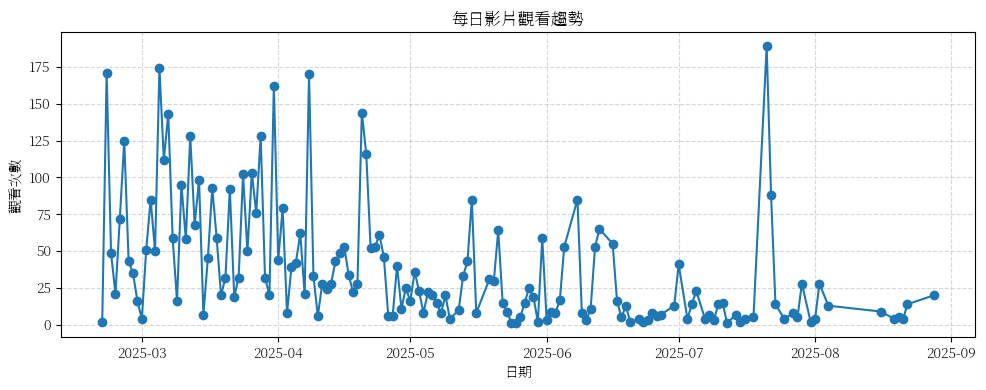

In [57]:
# 4) 畫「每日」趨勢圖（含網格）
plt.figure(figsize=(10,4))                               # 設定圖尺寸
plt.plot(daily.index, daily.values, marker="o")          # 折線＋圓點
plt.title("每日影片觀看趨勢")                               # 圖標題（可自行修改）
plt.xlabel("日期"); plt.ylabel("觀看次數")                 # 座標軸標籤
plt.grid(True, linestyle="--", alpha=0.5)                # 開啟網格線（虛線、半透明）
plt.tight_layout()                                       # 自動調整邊界避免字被切
# plt.savefig("daily_views.png", dpi=200)                # （可選）存成圖檔
plt.show()                                               # 顯示圖表

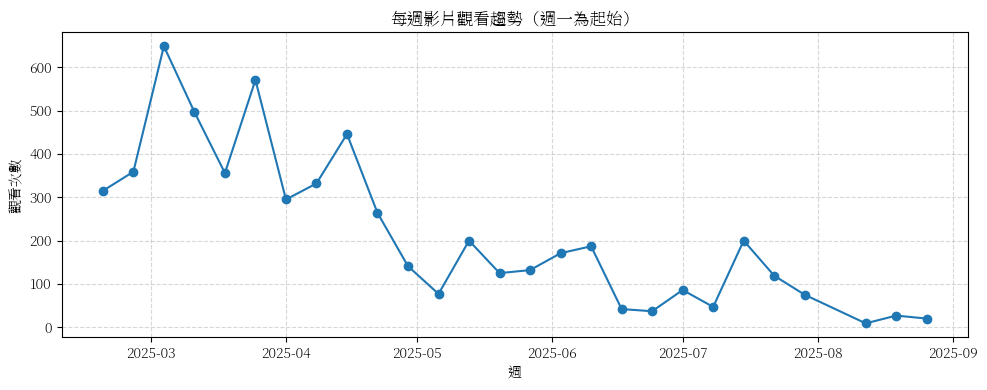

In [58]:
# 5) 畫「每週」趨勢圖（含網格）
plt.figure(figsize=(10,4))                               # 另一張圖
plt.plot(weekly.index, weekly.values, marker="o")        # 折線＋圓點
plt.title("每週影片觀看趨勢（週一為起始）")                   # 標題
plt.xlabel("週"); plt.ylabel("觀看次數")                   # 座標軸標籤
plt.grid(True, linestyle="--", alpha=0.5)                # 開啟網格線
plt.tight_layout()                                       # 自動調整邊界
# plt.savefig("weekly_views.png", dpi=200)               # （可選）存成圖檔
plt.show()

# 七、學習分佈傾向「星期 × 小時」-熱力圖

In [59]:
# 1) 讀檔（Colab 請把檔案放在 /content/，路徑自行調整）
df = pd.read_excel("/content/生成式AI增能攻略-10002641_影片瀏覽.xlsx", sheet_name="影片瀏覽")  # 讀入試算表
df.head()

,username,title,click,video-time,start-time,end-time,playing-time,speed
0,moesso_284295,微調LLaMA模型,1,00:00:11,2025-05-02 17:09:20,2025-05-02 17:29:04,1184,1x
1,moesso_284295,微調LLaMA模型,2,00:00:00,2025-05-02 17:09:40,2025-05-02 17:29:25,1185,1x
2,moesso_284295,微調LLaMA模型,3,00:00:11,2025-05-02 17:29:24,2025-05-02 17:29:26,2,1x
3,moesso_284295,微調LLaMA模型,4,00:13:30,2025-05-02 17:50:54,2025-05-02 17:50:54,0,1x
4,moesso_284295,微調LLaMA模型,5,00:00:11,2025-05-02 17:50:53,2025-05-02 17:55:59,306,1x


In [60]:
# 2) 產生「星期 × 小時」表（Mon..Sun × 0..23）
t = pd.to_datetime(df["start-time"], errors="coerce")              # 時間欄位
p = (pd.crosstab(t.dt.day_name().str[:3], t.dt.hour)               # 交叉表
       .reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])       # 固定星期順序
       .fillna(0).astype(int))

p

start-time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start-time,,,,,,,,,,,,,,,,,,,,,
Mon,40,2,0,3,0,0,14,23,25,37,...,77,131,110,57,36,73,152,61,26,22
Tue,4,2,0,0,0,0,8,174,46,48,...,119,63,60,26,45,27,20,64,90,10
Wed,5,2,0,0,0,2,10,14,23,85,...,116,115,156,36,20,18,29,15,13,14
Thu,11,3,2,0,8,2,5,14,12,36,...,61,112,37,22,39,21,13,21,33,26
Fri,21,12,5,37,2,0,1,4,56,52,...,93,87,56,19,30,18,64,54,29,30
Sat,34,15,7,10,0,23,3,6,13,4,...,27,47,33,24,14,5,16,32,27,22
Sun,3,11,11,8,0,0,28,17,3,10,...,13,77,89,10,22,20,14,33,43,13


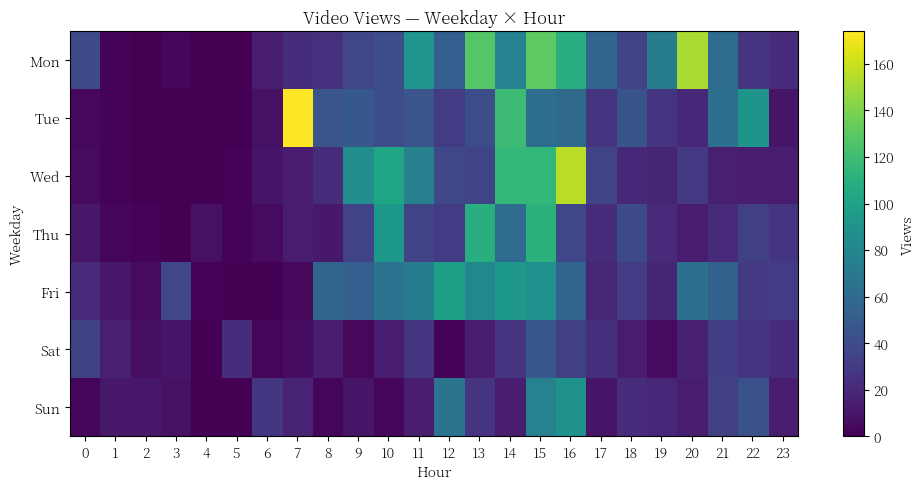

In [61]:
# 3) 熱力圖
plt.figure(figsize=(10, 5))
plt.imshow(p.values, aspect="auto")       # 不指定配色，走預設
plt.yticks(range(len(p.index)), p.index)
plt.xticks(range(24), range(24))
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.title("Video Views — Weekday × Hour")
plt.colorbar(label="Views")
plt.tight_layout()
#plt.savefig("weekday_hour_heatmap.png", dpi=200)
plt.show()

# 八、各影片的短Session佔比-長條圖

In [62]:
# 1) 讀檔（Colab 請把檔案上傳到 /content/ 後改成正確路徑）
df = pd.read_excel("/content/生成式AI增能攻略-10002641_影片瀏覽.xlsx", sheet_name="影片瀏覽")
df.head()

,username,title,click,video-time,start-time,end-time,playing-time,speed
0,moesso_284295,微調LLaMA模型,1,00:00:11,2025-05-02 17:09:20,2025-05-02 17:29:04,1184,1x
1,moesso_284295,微調LLaMA模型,2,00:00:00,2025-05-02 17:09:40,2025-05-02 17:29:25,1185,1x
2,moesso_284295,微調LLaMA模型,3,00:00:11,2025-05-02 17:29:24,2025-05-02 17:29:26,2,1x
3,moesso_284295,微調LLaMA模型,4,00:13:30,2025-05-02 17:50:54,2025-05-02 17:50:54,0,1x
4,moesso_284295,微調LLaMA模型,5,00:00:11,2025-05-02 17:50:53,2025-05-02 17:55:59,306,1x


In [63]:
# 2) 計算每筆觀看的停留秒數；<30 秒視為短會話（門檻可改 short_sec=60）
short_sec = 30
t0 = pd.to_datetime(df["start-time"], errors="coerce")
t1 = pd.to_datetime(df["end-time"],   errors="coerce")
# 把所有小於 0 的值設為 0、大於 36000 的值設為36000
session = (t1 - t0).dt.total_seconds().clip(lower=0, upper=36000)

# 3) 計算「每支影片的短Session比例（跳出率）」，並把結果由高到低排好
rate = (df.assign(short=session < short_sec)   # 建立布林欄位 short
          .groupby("title")["short"]           # 以影片分組後只取 short 欄
          .mean()                              # 布林平均 = 比例
          .sort_values(ascending=False))       # 由高到低排序，便於找出最需要優化的影片
rate

,short
title,
自動生成題目在教育領域,0.622172
Perplexity AI,0.611276
使用mlx進行語意分析、生成圖形、生成文字,0.604685
自動生成題目及評估,0.602851
Intelligent Tutoring System(ITS),0.594286
使用最小的硬碟執行最大的語言模型,0.594142
Apple的MLX生態系,0.575403
各種AI工具比較,0.526196
微調LLaMA模型,0.519427


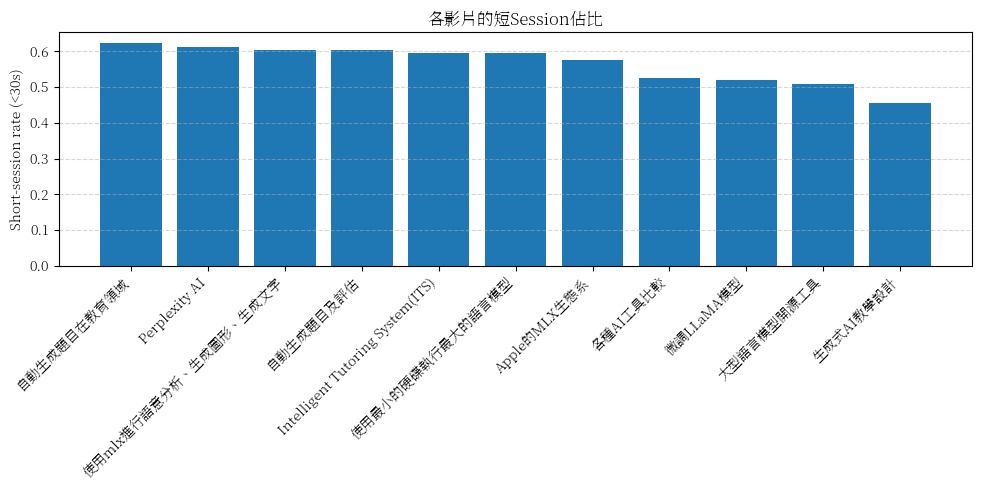

In [64]:
# 4) 視覺化（長條圖；含網格）
plt.figure(figsize=(10, 5))
plt.bar(rate.index.astype(str), rate.values)             # 長條圖：x=影片、y=短會話比例
plt.xticks(rotation=45, ha="right")                      # 旋轉 x 軸標籤，避免重疊
plt.ylabel(f"Short-session rate (<{short_sec}s)")        # y 軸標籤顯示門檻
plt.title("各影片的短Session佔比")                         # 圖標題
plt.grid(True, axis="y", linestyle="--", alpha=0.5)      # y 向網格（虛線、半透明）
plt.tight_layout()                                       # 自動調整邊界
#plt.savefig("short_session_rate_by_title.png", dpi=200)
plt.show()